In [6]:
import numpy as np 
color = tuple(np.random.choice(range(255),size=3))
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

In [9]:
import numpy as np

color = tuple(np.random.choice(range(255), size=3))
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

class_color_dict = {}

for class_name in classes:
    class_color_dict[class_name] = color

print(class_color_dict)

{'Hardhat': (98, 244, 232), 'Mask': (98, 244, 232), 'NO-Hardhat': (98, 244, 232), 'NO-Mask': (98, 244, 232), 'NO-Safety Vest': (98, 244, 232), 'Person': (98, 244, 232), 'Safety Cone': (98, 244, 232), 'Safety Vest': (98, 244, 232), 'machinery': (98, 244, 232), 'vehicle': (98, 244, 232)}


In [11]:
import numpy as np

color = tuple(np.random.choice(range(255), size=3))
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

class_color_dict = {class_name: color for class_name in classes}

print(class_color_dict['Hardhat'])

(127, 130, 93)


In [13]:
import numpy as np

num_colors = 10
color_list = []

for _ in range(num_colors):
    color = tuple(np.random.randint(0, 256, size=3))
    color_list.append(color)

print(color_list)

[(105, 44, 16), (86, 142, 110), (155, 90, 41), (96, 104, 214), (244, 167, 181), (240, 139, 151), (215, 6, 190), (229, 15, 148), (242, 68, 150), (130, 161, 202)]


In [15]:
color = [(105, 44, 16), (86, 142, 110), (155, 90, 41), (96, 104, 214), (244, 167, 181), (240, 139, 151), (215, 6, 190), (229, 15, 148), (242, 68, 150), (130, 161, 202)]
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

class_color_dict = dict(zip(classes, color))

print(class_color_dict['Hardhat'])


(105, 44, 16)


In [16]:
import random

num_colors = 10
color_list = []

for _ in range(num_colors):
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    color_list.append(color)

print(color_list)

[(2, 206, 25), (172, 107, 72), (178, 143, 30), (162, 156, 105), (215, 20, 93), (159, 70, 11), (142, 52, 108), (143, 152, 137), (80, 169, 71), (115, 112, 143)]


Connected to PostgreSQL


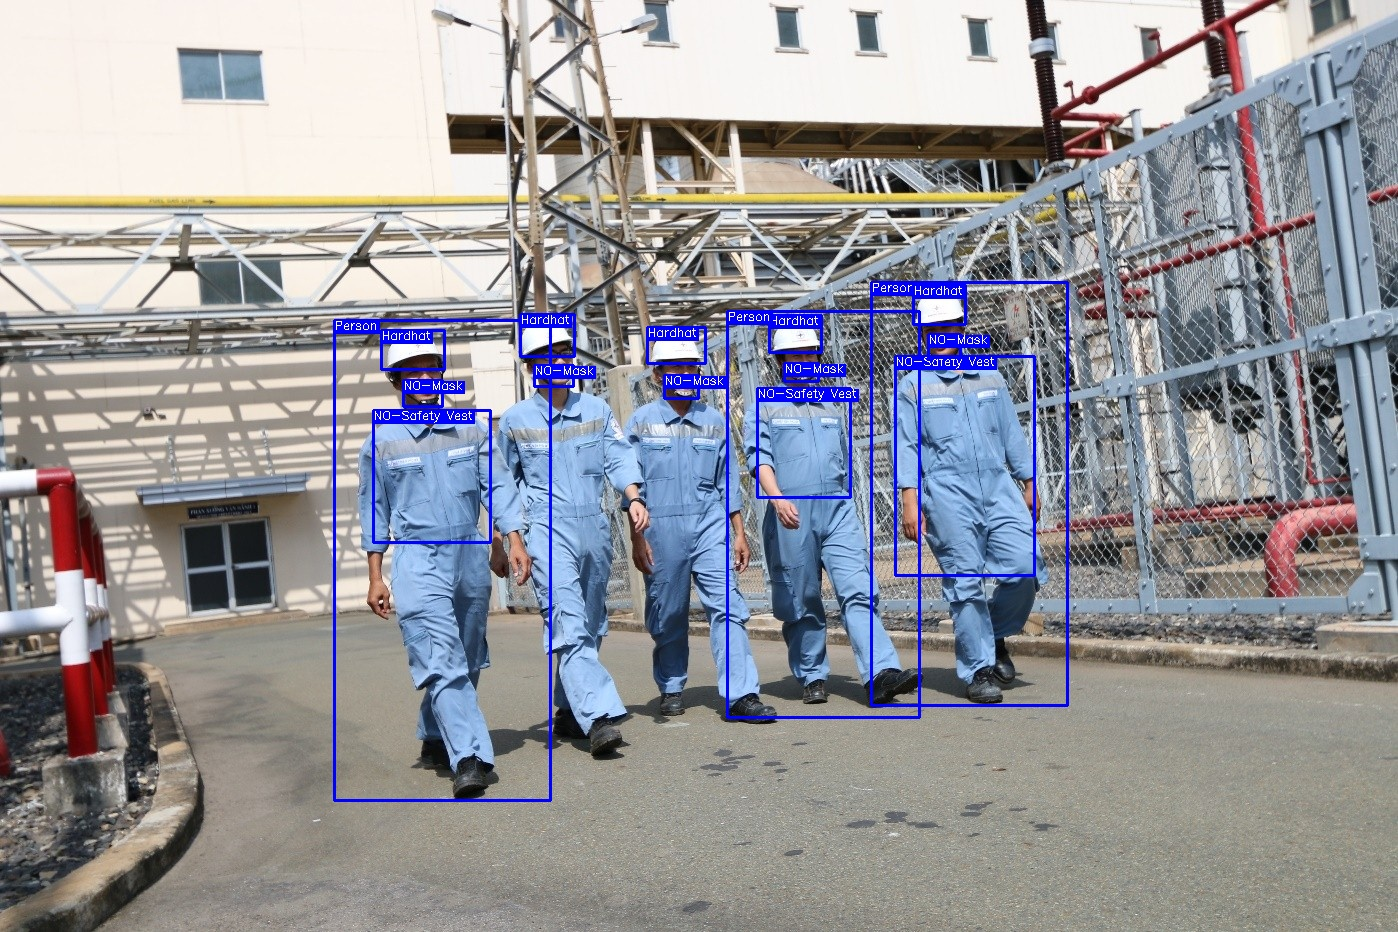

In [15]:
import psycopg2
import io
from PIL import Image
import psycopg2

# Kết nối đến cơ sở dữ liệu PostgreSQL
def connect():
    try:
        conn = psycopg2.connect(
            host="localhost",
            port="5432",
            database="postgres",
            user="postgres",
            password="1234"
            # options="-c search_path=Safety_PPE"
        )
        print("Connected to PostgreSQL")
        cursor = conn.cursor()
        # Tạo schema 'Safety_PPE' nếu chưa tồn tại
        create_schema_query = "CREATE SCHEMA IF NOT EXISTS Safety_PPE;"
        cursor.execute(create_schema_query)

        # Sử dụng schema 'Safety_PPE'
        use_schema_query = "SET search_path TO Safety_PPE, public;"
        cursor.execute(use_schema_query)
        return conn
    except (Exception, psycopg2.DatabaseError) as error:
        print("Failed to connect to PostgreSQL", error)
        
def read_image_from_database(conn, image_id):
    try:
        cursor = conn.cursor()

        # Query to fetch the image data from the database
        query = "SELECT Images FROM IMAGES WHERE ImageID = %s;"
        cursor.execute(query, (image_id,))
        image_data = cursor.fetchone()[0]
        # print(cursor.fetchone()[0])
        print(image_data)

        # Create a BytesIO object to read the image data
        image_stream = io.BytesIO(image_data)

        # Open the image using PIL library
        image = Image.open(image_stream)

        # Save the image to the specified output file
        # image.save(output_file)
        print("Image saved successfully.")
        return image

    except (Exception, psycopg2.DatabaseError) as error:
        print("Failed to read image from database", error)

conn = connect()
abc = read_image_from_database(conn, 1)
abc


In [23]:
data = [
    {
        "DoChinhXac": 0.8747509837,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "Person",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.78978860376,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "NO-Safety Vest",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.780796527875,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "Hardhat",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.7881419063,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "NO-Hardhat",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.5875384211499999,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "NO-Mask",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.8892735243,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 2,
        "NameObject": "Person",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.8820995688,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 2,
        "NameObject": "NO-Hardhat",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.8062503338,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 2,
        "NameObject": "NO-Mask",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.6419889927,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 2,
        "NameObject": "Safety Vest",
        "NgayTest": "01-06-2023",
        "UserID": 1
    }
]
def get_average(results):
    averages = {}

    for item in data:
        UserID = str(item["UserID"])  # Chuyển UserID sang kiểu chuỗi
        image_id = item["ImageID"]
        name_object = item["NameObject"]
        do_chinh_xac = item["DoChinhXac"]
        NgayTest = item["NgayTest"]
        Image = item["Image"]

        if image_id not in averages:
            averages[image_id] = {}
        if name_object not in averages[image_id]:
            averages[image_id][name_object] = {}
        if Image not in averages[image_id][name_object]:
            averages[image_id][name_object][Image] = []

        averages[image_id][name_object][Image].append(do_chinh_xac)

    # Tính trung bình cộng và gộp kết quả
    result = []

    for image_id, name_objects in averages.items():
        for name_object, images in name_objects.items():
            for image, do_chinh_xacs in images.items():
                average = sum(do_chinh_xacs) / len(do_chinh_xacs)
                result.append({
                    "UserID": UserID,
                    "Image": image,
                    "ImageID": image_id,
                    "NameObject": name_object,
                    "NgayTest": NgayTest,
                    "DoChinhXac": average
                })
    return result

data = get_average(data)
print(data)


# def get_average(results):
#     averages = {}

#     for item in data:
#         UserID = item["UserID"]
#         image_id = item["ImageID"]
#         name_object = item["NameObject"]
#         do_chinh_xac = item["DoChinhXac"]
#         NgayTest = item["NgayTest"]
#         Image = item["Image"]

#         if image_id not in averages:
#             averages[image_id] = {}
#         if name_object not in averages[image_id]:
#             averages[image_id][name_object] = {}
#         if Image not in averages[image_id][name_object]:
#             averages[image_id][name_object][Image] = []

#         averages[image_id][name_object][Image].append(do_chinh_xac)

#     # Tính trung bình cộng và gộp kết quả
#     result = []
#     print(averages)

#     for image_id, name_objects in averages.items():
#         for name_object, do_chinh_xacs in name_objects.items():
#             average = sum(do_chinh_xacs) / len(do_chinh_xacs)
#             result.append({
#                 "UserID": UserID,
#                 "Image": Image,
#                 "ImageID": image_id,
#                 "NameObject": name_object,
#                 "NgayTest": NgayTest,
#                 "DoChinhXac": average
#             })
#     return result

data = get_average(data)
data


[{'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'Person', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8747509837}, {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Safety Vest', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.78978860376}, {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.780796527875}, {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.7881419063}, {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Mask', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.5875384211499999}, {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'Person', 'Ngay

[{'UserID': '1',
  'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg',
  'ImageID': 1,
  'NameObject': 'Person',
  'NgayTest': '01-06-2023',
  'DoChinhXac': 0.8747509837},
 {'UserID': '1',
  'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg',
  'ImageID': 1,
  'NameObject': 'NO-Safety Vest',
  'NgayTest': '01-06-2023',
  'DoChinhXac': 0.78978860376},
 {'UserID': '1',
  'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg',
  'ImageID': 1,
  'NameObject': 'Hardhat',
  'NgayTest': '01-06-2023',
  'DoChinhXac': 0.780796527875},
 {'UserID': '1',
  'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg',
  'ImageID': 1,
  'NameObject': 'NO-Hardhat',
  'NgayTest': '01-06-2023',
  'DoChinhXac': 0.7881419063},
 {'UserID': '1',
  'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg',
  'ImageID': 1,
  'NameObject': 'NO-Mask',
  'NgayTest': '01-06-2023',
  'DoChinhXac': 0.5875384211499999},
 {'UserID': '1',
  'Image': './PhanLoai/src/assets/01-06-2023/run2/

In [26]:
from collections import defaultdict

data = [
    {
        "DoChinhXac": 0.8747509837,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "Person",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.78978860376,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "NO-Safety Vest",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.780796527875,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "Hardhat",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.7881419063,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "NO-Hardhat",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.5875384211499999,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 1,
        "NameObject": "NO-Mask",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.8892735243,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 2,
        "NameObject": "Person",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.8820995688,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 2,
        "NameObject": "NO-Hardhat",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.8062503338,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 2,
        "NameObject": "NO-Mask",
        "NgayTest": "01-06-2023",
        "UserID": 1
    },
    {
        "DoChinhXac": 0.6419889927,
        "Image": "./PhanLoai/src/assets/01-06-2023/run2/predict.jpg",
        "ImageID": 2,
        "NameObject": "Safety Vest",
        "NgayTest": "01-06-2023",
        "UserID": 1
    }
]

from collections import defaultdict

def get_average(results):
    averages = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    for item in results:
        image_id = item["ImageID"]
        name_object = item["NameObject"]
        do_chinh_xac = item["DoChinhXac"]
        image = item["Image"]

        averages[image_id][name_object][image].append(do_chinh_xac)

    # Tính trung bình cộng và gộp kết quả
    result = []
    for image_id, name_objects in averages.items():
        for name_object, images in name_objects.items():
            for image, do_chinh_xacs in images.items():
                average = sum(do_chinh_xacs) / len(do_chinh_xacs)
                result.append({
                    "UserID": results[0]["UserID"],
                    "Images": image,
                    "ImageID": image_id,
                    "NameObject": name_object,
                    "NgayTest": results[0]["NgayTest"],
                    "DoChinhXac": average
                })

    return result

data = get_average(data)
print(data)


[{'UserID': 1, 'Images': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'Person', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8747509837}, {'UserID': 1, 'Images': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Safety Vest', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.78978860376}, {'UserID': 1, 'Images': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.780796527875}, {'UserID': 1, 'Images': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.7881419063}, {'UserID': 1, 'Images': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Mask', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.5875384211499999}, {'UserID': 1, 'Images': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'Person', 'NgayTest':

In [ ]:
[{'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'Person', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8747509837}, 
 {'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Safety Vest', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.78978860376}, 
 {'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.780796527875}, 
 {'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.7881419063}, 
 {'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Mask', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.5875384211499999}, 
 {'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'Person', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8892735243}, 
 {'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'NO-Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8820995688}, 
 {'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'NO-Mask', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8062503338}, 
 {'UserID': 1, 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'Safety Vest', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.6419889927}]


[{'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'Person', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8747509837}, 
 {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Safety Vest', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.78978860376}, 
 {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.780796527875}, 
 {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.7881419063}, 
 {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 1, 'NameObject': 'NO-Mask', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.5875384211499999}, 
 {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'Person', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8892735243}, 
 {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'NO-Hardhat', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8820995688}, 
 {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'NO-Mask', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.8062503338}, 
 {'UserID': '1', 'Image': './PhanLoai/src/assets/01-06-2023/run2/predict.jpg', 'ImageID': 2, 'NameObject': 'Safety Vest', 'NgayTest': '01-06-2023', 'DoChinhXac': 0.6419889927}]